In [39]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [40]:
class Organism:
    pattCom = []
    cost = 0

    #patterns
    pattern1 = np.array([3, 0, 0]).reshape(3, 1)
    pattern2 = np.array([0, 2, 0]).reshape(3, 1)
    pattern3 = np.array([0, 0, 2]).reshape(3, 1)
    pattern4 = np.array([2, 0, 1]).reshape(3, 1)
    pattern5 = np.array([2, 1, 0]).reshape(3, 1)
    pattern6 = np.array([0, 1, 1]).reshape(3, 1)

    #order placed
    order = np.array([80, 50, 100]).reshape(3, 1)

    def __init__(self, pc):
        self.pattCom = pc.copy()
        self.calcCost()
    
    #fitness function
    def calcCost(self):
        outputMatrix = (self.pattern1 * int(self.pattCom[0],2)) + \
            (self.pattern2 * int(self.pattCom[1],2)) + \
            (self.pattern3 * int(self.pattCom[2],2)) + \
            (self.pattern4 * int(self.pattCom[3],2)) + \
            (self.pattern5 * int(self.pattCom[4],2)) + \
            (self.pattern6 * int(self.pattCom[5],2))

        wasteMatrix = outputMatrix - self.order
        self.cost = 0
        for i in wasteMatrix:
            if int(i) < 0: 
                self.cost = 100000
                break
            self.cost = self.cost + int(i)
    
    def changeOrder(self, newOrder):
        self.order = newOrder

In [41]:
#Cutting Stock Problem

genSize = 300
Gen = []
genNum = 250
count = 0
avgList = []
minimum = {"pattCom": [], "cost": 100000}

#create initial population
for i in range(genSize):
    pattCom = []
    for j in range(6):
        num = 0
        for k in range(7):
            if random.randint(0, 1) == 1:
                num = num + pow(2, k)
        pattCom.append(f'{num:0{7}b}')
    
    Gen.append(Organism(pattCom))


while count < genNum:

    #calc average
    avg = 0
    for g in Gen:
        g = Organism(g.pattCom)
        if g.cost != 100000:
            # find total minimum
            if g.cost < minimum['cost']:
                minimum['cost'] = g.cost
                minimum['pattCom'] = g.pattCom.copy()
            avg = avg + g.cost
    avg = format(avg / len(Gen), '.2f')
    avgList.append((float(avg)))

    #get the best organisms
    bestOfGen = []
    Gen.sort(key=lambda x: x.cost, reverse=False)
    for index, i in enumerate(Gen):
        #reproduction (elite selection)
        if index < (int)(genSize / 2):
            bestOfGen.append(Organism(i.pattCom))
            bestOfGen.append(Organism(i.pattCom))
    
    #crossover
    random.shuffle(bestOfGen)
    for index, b in enumerate(bestOfGen[::2]):
        b2 = bestOfGen[index + 1]
        for i in range(6):
            b_string = b.pattCom[i]
            b2_string = b2.pattCom[i]

            b_p1 = b_string[:3]
            b_p2 = b_string[3:]
            b2_p1 = b2_string[:3]
            b2_p2 = b2_string[3:]

            b.pattCom[i] = b2_p1 + b_p2
            b2.pattCom[i] = b_p1 + b2_p2
    
    #mutation
    for b in bestOfGen:
        for index, i in enumerate(b.pattCom):
            charList = list(i)
            randIdx = random.randint(0, 6)
            if charList[randIdx] == '0':
                charList[randIdx] = '1'
            else:
                charList[randIdx] = '0'
            
            b.pattCom[index] = ''.join(charList)
    
    Gen = bestOfGen.copy()
    count = count + 1
          

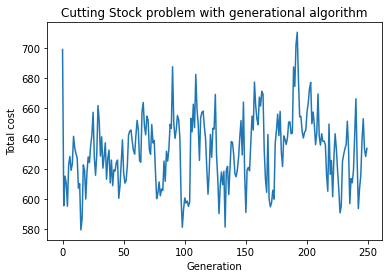

smallest pattern combination: [4, 18, 51, 8, 31, 2]
cost of pattern combination: 41


In [42]:
#Results
xAxis = np.arange(0, genNum)
plt.plot(xAxis,avgList)
plt.title('Cutting Stock problem with generational algorithm')
plt.xlabel('Generation')
plt.ylabel('Total cost')
plt.show()

results = []
for p in minimum['pattCom']:
    p = int(p, 2)
    results.append(p)
print("smallest pattern combination: " + str(results))
print("cost of pattern combination: " + str(minimum['cost']))